<a href="https://colab.research.google.com/github/elsoori/CropDoc/blob/main/cropdoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CropDoc
### Your Toolkit to Growing Healthier Fields

In [ ]:
!pip install -Uqq fastai duckduckgo_search fastbook timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *
from fastcore.all import *
import timm

In [ ]:
from fastdownload import download_url
from time import sleep

In [ ]:
from google.colab import drive
drive.mount('/content/hackthonUI2023', force_remount=True)

Mounted at /content/hackthonUI2023


In [ ]:
def search_images( term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images_ddg('Alfalfa mosaic on soybean', max_images=1)
urls[0]

'http://2.bp.blogspot.com/--MOSxuGnnCs/Tdyi9z8vdII/AAAAAAAAAcQ/vna6xrH5K6k/s320/2+Soybean+mosaic.jpg'

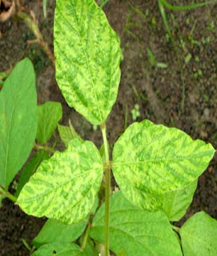

In [ ]:
dest = 'Alfalfa mosaic.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

### Now we shall download all the Common Soy Bean Leaf Diseases

In [ ]:
disease_types = 'Brown Spot','Bacterial Blight', 'Bacterial Pustule', 'Frogeye Leaf Spot', 'Cercospora Leaf Blight','Downy Mildew'
path = Path('Soybeans')
from time import sleep

for o in disease_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents =True)
    download_images(dest, urls=search_images_ddg(f'{o} on Soybean plant'))
    sleep(1)

    resize_images(path/o, max_size=200, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

33

In [ ]:
Soybeans = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

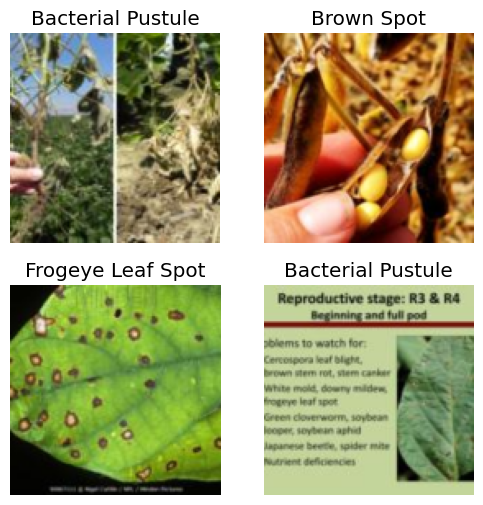

In [ ]:
dls = Soybeans.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=2)

In [ ]:
Soybeans = Soybeans.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = Soybeans.dataloaders(path)

In [ ]:
import timm

In [ ]:
timm.list_models("convnext*")

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [ ]:
learn = vision_learner(dls,resnet34, metrics=error_rate)
learn.fine_tune(4)

OutOfMemoryError: ignored

In [ ]:
import torch
torch.cuda.empty_cache()